<a href="https://colab.research.google.com/github/doowilliams/data_science_poortfolio/blob/main/Building_a_simple_NLP_Spam_and_Harm_Dectector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a simple NLP Spam and Harm Dectector

### 1.0 loading our Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam.csv", encoding = "latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


Let's rename our cloumns to something more interpretable and extract only the columns we need 

In [ ]:
df = df [['v1','v2']]

df = df.rename(columns={'v1':'label','v2':'text'})

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.sum().isnull()

label    False
text     False
dtype: bool

In [ ]:
df[df[['label','text']].duplicated()==True]

,label,text
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [ ]:
df = df.drop_duplicates()

In [ ]:
# sanity check to meke sure it worked

df[df[['label','text']].duplicated() ==True]

,label,text


In [ ]:
import matplotlib.pyplot as plt


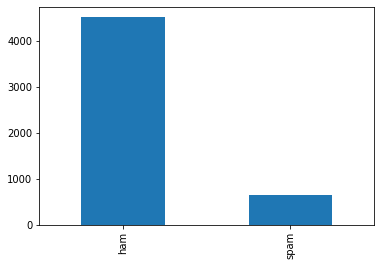

In [ ]:
df.label.value_counts().plot(kind = 'bar')

## Building our model for Spam/Ham classifer

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import  svm

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

In [ ]:
def review_message(msg):
  #converting messages to lowercase

  msg = msg.lower()

  return msg

In [ ]:
# processing text messages
df['text'] = df['text'].apply(review_message)

In [ ]:
df.head()

,label,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


## Preparing our data

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.1, random_state =1)

In [ ]:
pip install -u scikit-learn


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
# training vectorizer
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)

In [ ]:
# Trainig the classifier
svm = svm.SVC(C = 1000)
svm.fit(x_train_vec, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# testing against testing set
x_test = vectorizer.transform(x_test)
y_pred = svm.predict(x_test)

In [ ]:
print("We have an accuracy of :" +str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

We have an accuracy of :0.9845261121856866
[[462   0]
 [  8  47]]
